In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz
import seaborn as sns


In [2]:
path = "../input/comprehensive-database-of-minerals/Minerals_Database.csv"
minerals_df = pd.read_csv(path)

In [3]:
phys = ["Unnamed: 0", "Name","Crystal Structure","Mohs Hardness", 'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index', 'Dispersion','Molar Mass','Molar Volume','Calculated Density']
chem_df = minerals_df.drop(columns=phys)     #dataframe of chemical composition
minerals_df = minerals_df[phys]              #dataframe of physical properties
minerals_df = minerals_df[minerals_df['Crystal Structure'] != 0]
minerals_df.head(10)

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,921.092220,0.122631,6.234
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,861.185368,0.112074,6.378
5,5,Acuminite,2.0,3.50,3.0,3.295,4.0,1.457,0.0,225.618151,0.044887,4.172
6,6,Adamite,3.0,3.50,0.0,4.400,4.0,1.742,0.0,270.707130,0.056025,4.010
8,8,Admontite,2.0,2.50,0.0,0.000,4.0,1.473,0.0,407.639360,0.302614,1.118
9,9,Aegirine,2.0,6.00,1.0,3.550,4.0,1.776,0.0,154.920468,0.033631,3.823
10,10,Aenigmatite,1.0,5.50,1.0,3.810,4.0,1.829,0.0,1110.587536,0.224182,4.112
11,11,Aerinite,2.0,3.00,2.0,2.480,4.0,3.383,0.0,706.631179,0.123242,4.759


In [4]:
minerals_df.describe()

,Unnamed: 0,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,406.836066,2.878415,3.459727,1.680328,2.739011,2.935792,1.338817,0.001941,483.776445,0.099766,4.775519
std,232.557635,1.364078,2.194766,1.031114,1.826228,1.550774,0.740035,0.014028,476.295121,0.097977,2.681635
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.011580,0.011054,0.586000
25%,206.750000,2.000000,2.000000,1.000000,1.876500,3.000000,1.474500,0.000000,196.497960,0.044808,2.819000
50%,406.500000,2.000000,3.500000,2.000000,2.942000,4.000000,1.611000,0.000000,337.795240,0.067378,4.199000
75%,606.500000,4.000000,5.312500,2.000000,3.700000,4.000000,1.726250,0.000000,581.248261,0.123287,6.206250
max,808.000000,6.000000,9.500000,3.000000,9.593000,4.000000,3.383000,0.213000,4079.341200,1.209774,13.893000


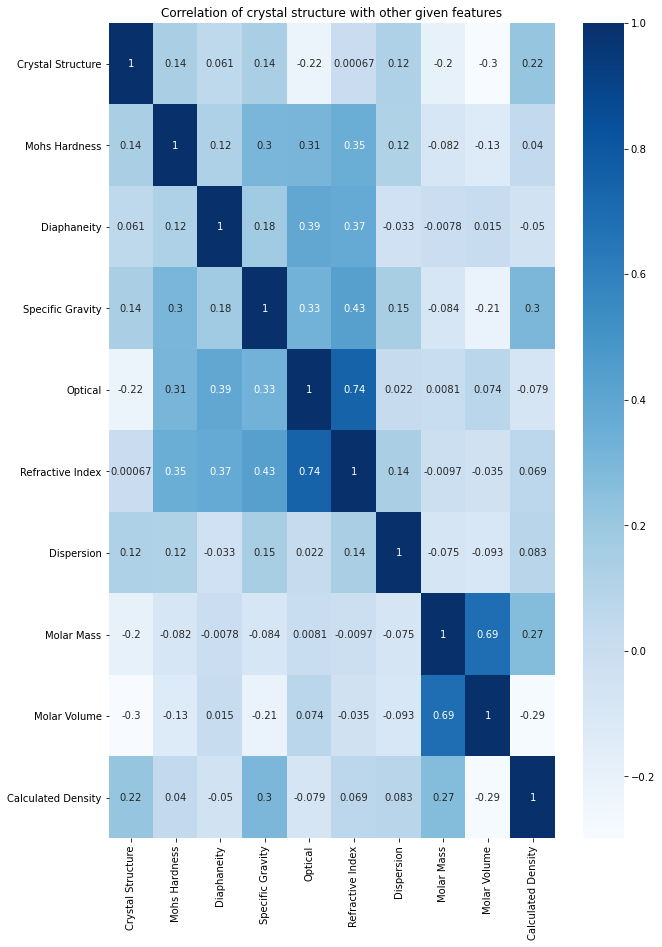

In [5]:
#Heatmap displaying correalation between each attributes
plt.figure(figsize=(10,15))
sns.heatmap(minerals_df[['Crystal Structure','Mohs Hardness','Diaphaneity','Specific Gravity','Optical','Refractive Index','Dispersion','Molar Mass','Molar Volume','Calculated Density']].corr(),annot=True,cmap='Blues');
plt.title('Correlation of crystal structure with other given features');
plt.show()

In [6]:
nonFeatureHeaders = ["Unnamed: 0", "Name", 
                     "Crystal Structure", 
                     "Mohs Hardness", 
                     'Diaphaneity', 
#                      'Specific Gravity', 
#                      'Optical', 
                     'Refractive Index', 
                     'Dispersion',
#                      'Molar Mass',
#                      'Molar Volume',
#                      'Calculated Density'
                    ]
X_all = minerals_df.drop(columns=nonFeatureHeaders)
y_all = minerals_df["Crystal Structure"]
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

X_all_train_scaled = X_all_train
X_all_test_scaled = X_all_test

Training Accuracy is  62.9059829059829


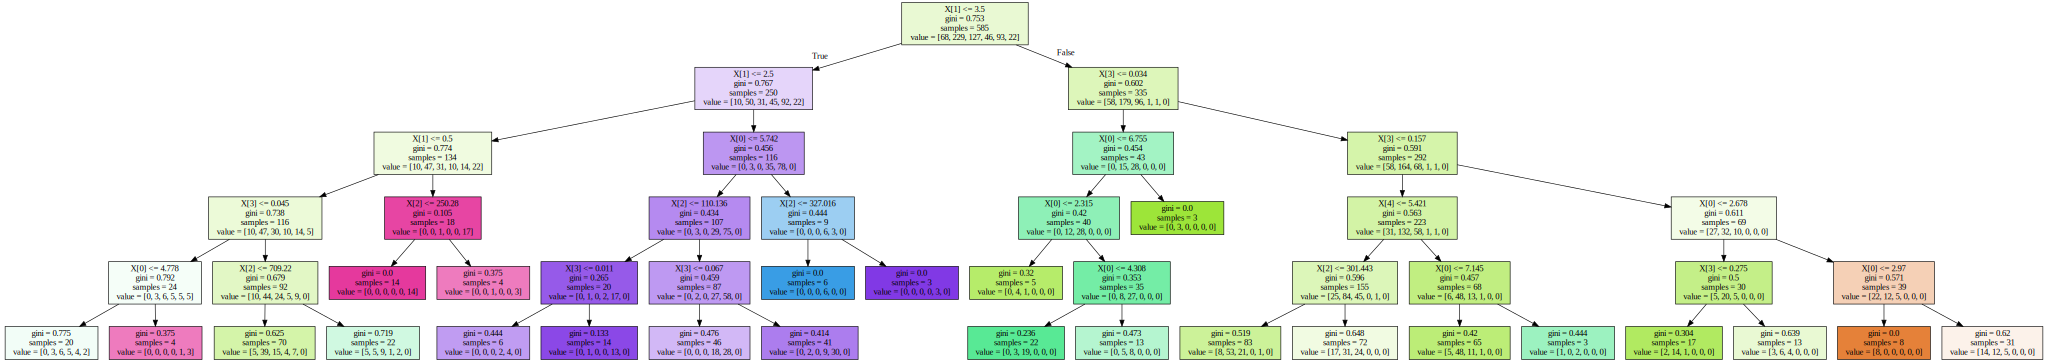

In [7]:
"""Decision Tree"""

decision_tree = DecisionTreeClassifier(random_state = None, max_depth=5, min_samples_leaf=3)

# Training/fitting the model with training data
decision_tree.fit(X_all_train_scaled, y_all_train)
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

y_train_pred=decision_tree.predict(X_all_train_scaled)
print("Training Accuracy is ", accuracy_score(y_all_train, y_train_pred)*100)

graph = graphviz.Source(dot_data)
graph

In [8]:
y_test_pred=decision_tree.predict(X_all_test_scaled)
print("Validation Accuracy is ", accuracy_score(y_all_test,y_test_pred)*100)

Validation Accuracy is  54.421768707483


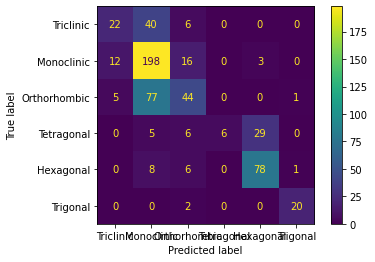

In [9]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(decision_tree, X_all_train_scaled, y_all_train, 
                      values_format='d', 
                       display_labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Hexagonal', 'Trigonal']
                     )

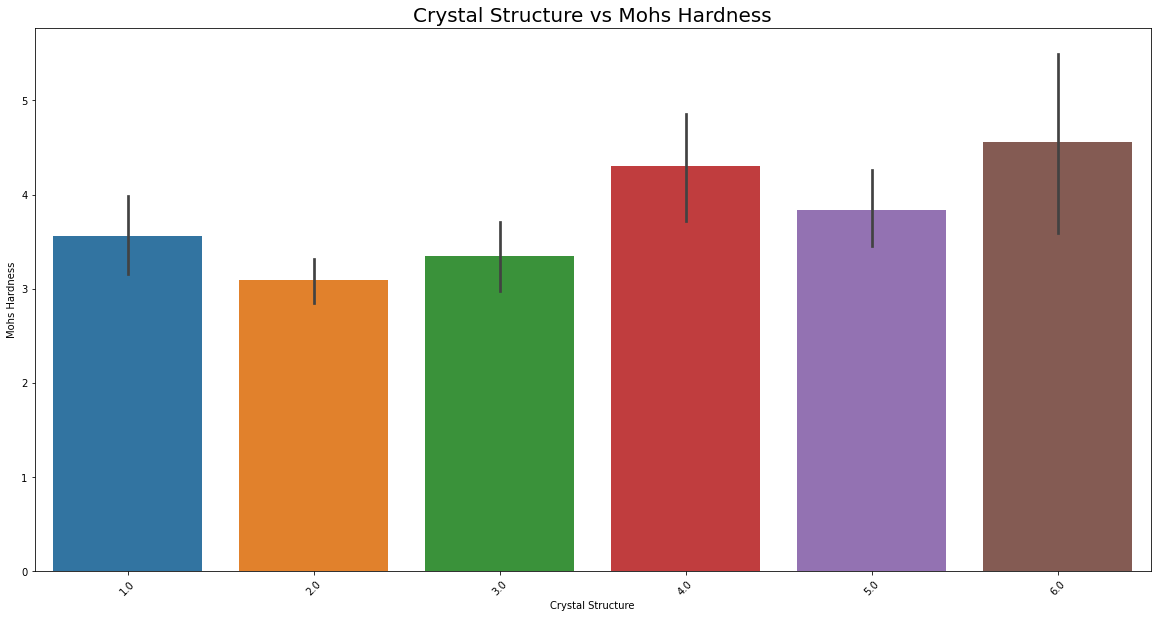

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x=minerals_df['Crystal Structure'],y=minerals_df['Mohs Hardness'])
plt.title('Crystal Structure vs Mohs Hardness',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
plt.show()